<a href="https://colab.research.google.com/github/WengGeyu/NMA-DL/blob/main/data_to_nnUNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/ColabNotebooks')
#!git clone https://github.com/MIC-DKFZ/nnUNet.git
%cd nnUNet
!pip install -e .
!pip install --upgrade git+https://github.com/FabianIsensee/hiddenlayer.git

In [ ]:
from batchgenerators.utilities.file_and_folder_operations import *
import shutil
from nnunetv2.dataset_conversion.generate_dataset_json import generate_dataset_json
from nnunetv2.paths import nnUNet_raw

def convert_aneurysm(kits_base_dir: str, nnunet_dataset_id: int = 666):
    task_name = "aneurysm"

    foldername = "Dataset%03.0d_%s" % (nnunet_dataset_id, task_name)

    # setting up nnU-Net folders
    out_base = join('/content/drive/MyDrive/ColabNotebooks/nnUNet/nnUNet_raw', foldername)
    imagestr = join(out_base, "imagesTr")
    labelstr = join(out_base, "labelsTr")
    maybe_mkdir_p(imagestr)
    maybe_mkdir_p(labelstr)

    cases = subdirs(kits_base_dir, prefix='sub_', join=False)
    for tr in cases:
        shutil.copy(join(kits_base_dir, tr, 'angio.nii.gz'), join(imagestr, f'{tr}_0000.nii.gz'))
        shutil.copy(join(kits_base_dir, tr, 'Lesion_1_mask.nii.gz'), join(labelstr, f'{tr}.nii.gz'))

    generate_dataset_json(out_base, {0: "TOF"},
                          labels={
                              "background": 0,
                              "aneurysm": 1
                          },
                          num_training_cases=len(cases), file_ending='.nii.gz')

convert_aneurysm('/content/drive/MyDrive/ColabNotebooks/data', 666)

In [ ]:
! nnUNet_raw="/content/drive/MyDrive/ColabNotebooks/nnUNet/nnUNet_raw" \
nnUNet_preprocessed="/content/drive/MyDrive/ColabNotebooks/nnUNet/nnUNet_preprocessed" \
nnUNet_results="/content/drive/MyDrive/ColabNotebooks/nnUNet/nnUNet_results" \
nnUNetv2_plan_and_preprocess -d 666 --verify_dataset_integrity

Training

In [ ]:
! nnUNet_raw="/content/drive/MyDrive/ColabNotebooks/nnUNet/nnUNet_raw" \
nnUNet_preprocessed="/content/drive/MyDrive/ColabNotebooks/nnUNet/nnUNet_preprocessed" \
nnUNet_results="/content/drive/MyDrive/ColabNotebooks/nnUNet/nnUNet_results" \
nnUNetv2_train 666 3d_lowres 0 -tr nnUNetTrainer_10epochs --c

Using device: cuda:0

#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################


This is the configuration used by this training:
Configuration name: 3d_lowres
 {'data_identifier': 'nnUNetPlans_3d_lowres', 'preprocessor_name': 'DefaultPreprocessor', 'batch_size': 2, 'patch_size': [56, 224, 192], 'median_image_size_in_voxels': [93, 335, 294], 'spacing': [0.8319214816658427, 0.6203981293351043, 0.6203981293351043], 'normalization_schemes': ['ZScoreNormalization'], 'use_mask_for_norm': [False], 'UNet_class_name': 'PlainConvUNet', 'UNet_base_num_features': 32, 'n_conv_per_stage_encoder': [2, 2, 2, 2, 2, 2], 'n_conv_per_stage_decoder': [2, 2, 2, 2, 2], 

In [36]:
! nnUNet_raw="/content/drive/MyDrive/ColabNotebooks/nnUNet/nnUNet_raw" \
nnUNet_preprocessed="/content/drive/MyDrive/ColabNotebooks/nnUNet/nnUNet_preprocessed" \
nnUNet_results="/content/drive/MyDrive/ColabNotebooks/nnUNet/nnUNet_results" \
nnUNetv2_predict -i "/content/drive/MyDrive/ColabNotebooks/nnUNet/nnUNet_raw/Dataset666_aneurysm/imagesTr" -o "/content/drive/MyDrive/ColabNotebooks/nnUNet/nnUNet_results/Dataset666_aneurysm/nnUNetTrainer__nnUNetPlans__2d/fold_0/predTs" -d 666 -c 2d -device cuda -f 0
# -chk checkpoint_best.pth


#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

There are 5 cases in the source folder
I am process 0 out of 1 (max process ID is 0, we start counting with 0!)
There are 5 cases that I would like to predict

Predicting sub_013:
perform_everything_on_gpu: True
100% 144/144 [00:12<00:00, 11.70it/s]
Prediction done, transferring to CPU if needed
sending off prediction to background worker for resampling and export
done with sub_013

Predicting sub_022:
perform_everything_on_gpu: True
100% 280/280 [00:21<00:00, 13.05it/s]
Prediction done, transferring to CPU if needed
sending off prediction to background worker for resampling and export
done

In [42]:
! nnUNet_raw="/content/drive/MyDrive/ColabNotebooks/nnUNet/nnUNet_raw" \
nnUNet_preprocessed="/content/drive/MyDrive/ColabNotebooks/nnUNet/nnUNet_preprocessed" \
nnUNet_results="/content/drive/MyDrive/ColabNotebooks/nnUNet/nnUNet_results" \
nnUNetv2_apply_postprocessing -i "/content/drive/MyDrive/ColabNotebooks/nnUNet/nnUNet_results/Dataset666_aneurysm/nnUNetTrainer__nnUNetPlans__2d/fold_0/predTs" -o "/content/drive/MyDrive/ColabNotebooks/nnUNet/nnUNet_results/Dataset666_aneurysm/nnUNetTrainer__nnUNetPlans__2d/fold_0/post" -pp_pkl_file postprocessing.pkl

Traceback (most recent call last):
  File "/usr/local/bin/nnUNetv2_apply_postprocessing", line 33, in <module>
    sys.exit(load_entry_point('nnunetv2', 'console_scripts', 'nnUNetv2_apply_postprocessing')())
  File "/content/drive/MyDrive/ColabNotebooks/nnUNet/nnunetv2/postprocessing/remove_connected_components.py", line 332, in entry_point_apply_postprocessing
    pp_fns, pp_fn_kwargs = load_pickle(args.pp_pkl_file)
  File "/usr/local/lib/python3.10/dist-packages/batchgenerators/utilities/file_and_folder_operations.py", line 57, in load_pickle
    with open(file, mode) as f:
FileNotFoundError: [Errno 2] No such file or directory: 'postprocessing.pkl'


Plotting Layer 28 of Image


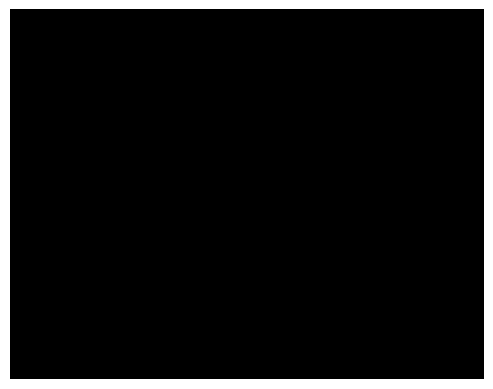

In [49]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

input_path = "/content/drive/MyDrive/ColabNotebooks/nnUNet/nnUNet_results/Dataset666_aneurysm/nnUNetTrainer__nnUNetPlans__2d/fold_0/predTs"
input_filename = os.path.join(input_path,'sub_013.nii.gz')
image_obj = nib.load(input_filename)
# Extract data as numpy ndarray
image_data = image_obj.get_fdata()
# Get the image shape
height, width, depth = image_data.shape
# print(f"The image object has the following dimensions: height: {height}, width:{width}, depth:{depth}")
# Select random layer number
maxval = depth
i = np.random.randint(0, maxval)
# Define a channel to look at
print(f"Plotting Layer {i} of Image")
plt.imshow(image_data[:, :, i], cmap='gray')
plt.axis('off');